<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #0000a3ff, #000035ff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       SONAR Rock vs Mine Prediction
    </h1>
</div>

<h4 style="color:#0000ffff">1. Importing Libraries for Data Handling, Model Training, Evaluation, and Visualization</h4>

In [102]:
import pandas as pd
import numpy as np
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

<h4 style="color:#0000ffff">2. Loading the Sonar Dataset and Displaying the First Seven Rows</h4>

In [3]:
sonar=pd.read_csv('Copy of sonar data.csv',header=None)
sonar.head(7)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


<h4 style="color:#0000ffff">3. Checking the Shape of the Sonar Dataset</h4>

In [4]:
sonar.shape

(208, 61)

<h4 style="color:#0000ffff">4. Generating Descriptive Statistics of the Sonar Dataset</h4>

In [5]:
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<h4 style="color:#0000ffff">5. Counting the Frequency of Each Class Label in the Sonar Dataset</h4>

In [6]:
sonar[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

<h4 style="color:#0000ffff">6. Calculating the Mean Feature Values Grouped by Class Label</h4>

In [7]:
sonar.groupby(60).mean()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


<h4 style="color:#0000ffff">7. Separating Features and Labels from the Sonar Dataset</h4>

In [8]:
x=sonar.drop(columns=60,axis=1)
x.shape
sonar[60]


0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

<h4 style="color:#0000ffff">8. Splitting the Dataset into Training and Testing Sets</h4>

In [9]:
X=sonar.drop(columns=60,axis=1)
Y=sonar[60]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=1,stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(187, 60)
(21, 60)
(187,)
(21,)


<h4 style="color:#0000ffff">9. Training the Logistic Regression Model</h4>

In [10]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

<h4 style="color:#0000ffff">10. Evaluating Training Accuracy of the Logistic Regression Model</h4>

In [11]:
x_predict=model.predict(x_train)
accuracy=accuracy_score(x_predict,y_train)
print(f"The accuracy is : {accuracy*100:.2F}%")

The accuracy is : 83.42%


<h4 style="color:#0000ffff">11. Evaluating Testing Accuracy of the Logistic Regression Model</h4>

In [12]:
x_predictTest=model.predict(x_test)
accuracy=accuracy_score(x_predictTest,y_test)
print(f"The accuracy is : {accuracy*100:.2F}%")

The accuracy is : 76.19%


<h4 style="color:#0000ffff">12. Preparing New Input Samples and Reshaping Them for Prediction</h4>

In [13]:
input1=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input2=(0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,0.3468,0.3738,0.3055,0.1926,0.1385,0.2122,0.2758,0.4576,0.6487,0.7154,0.8010,0.7924,0.8793,1.0000,0.9865,0.9474,0.9474,0.9315,0.8326,0.6213,0.3772,0.2822,0.2042,0.2190,0.2223,0.1327,0.0521,0.0618,0.1416,0.1460,0.0846,0.1055,0.1639,0.1916,0.2085,0.2335,0.1964,0.1300,0.0633,0.0183,0.0137,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,
)
inputasarray1=np.asarray(input1).reshape(1,-1)
inputasarray2=np.asarray(input2).reshape(1,-1)

<h4 style="color:#0000ffff">13. Making Predictions on New Samples and Displaying the Results</h4>

In [14]:
modelpredict1=model.predict(inputasarray1)
modelpredict2=model.predict(inputasarray2)
if modelpredict2[0]=='R':
    print("Rock")
elif modelpredict2[0]=='M':
    print("Mine")

Mine


<h4 style="color:#0000ffff">14. Visualizing the Confusion Matrix of the Logistic Regression Model</h4>

Text(0.5, 1.05, 'Confusion Matrix')

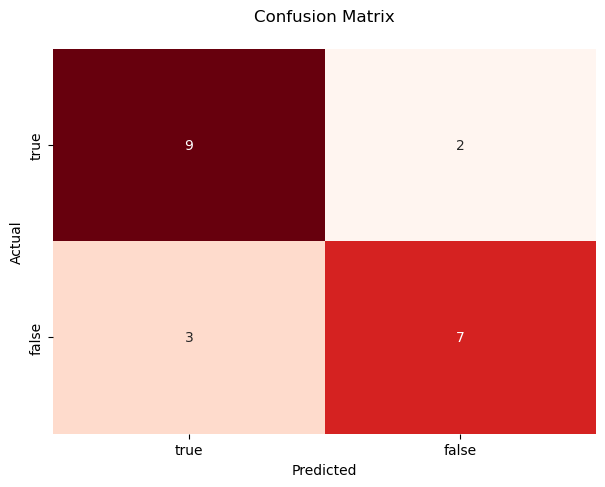

In [15]:
x_predict=model.predict(x_test)
xx=confusion_matrix(y_test,x_predict)
plt.figure(figsize=(7,5))
sns.heatmap(xx,annot=True,fmt='d',cmap='Reds',cbar=False,xticklabels=['true', 'false'], yticklabels=['true', 'false'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix',y=1.05)

<h4 style="color:#0000ffff">15. Loading the New Test Dataset and Viewing the Last Rows</h4>

In [85]:
sonarpred=pd.read_csv('sonarTest.csv')
sonarpred.tail()


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,2
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,2
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,2
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,2
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,2


<h4 style="color:#0000ffff">16. Mapping Numeric Class Labels to Rock (R) and Mine (M)</h4>

In [ ]:
sonarpred['Class'] = sonarpred['Class'].map({1: 'R', 2: 'M'})
sonarpred.head(300)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<h4 style="color:#0000ffff">17. Splitting the New Dataset, Making Predictions, and Generating the Confusion Matrix</h4>

In [87]:
x=sonarpred.drop(columns="Class")
y=sonarpred['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
modelpredict3=model.predict(x_test)
xx=confusion_matrix(y_test,modelpredict3)
xx

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[9, 3],
       [3, 6]])

<h4 style="color:#0000ffff">18. Visualizing the Confusion Matrix for the New Dataset</h4>

<Axes: title={'center': 'Confusion Matrix'}>

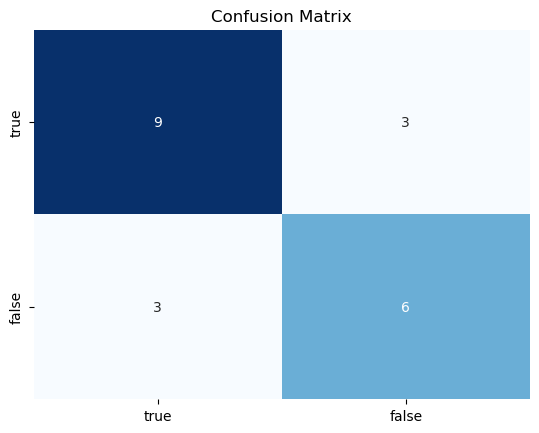

In [89]:
plt.Figure(figsize=(7,5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(xx,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['true', 'false'], yticklabels=['true', 'false'])

<h4 style="color:#0000ffff">19. Generating and Displaying the Classification Report with Styled HTML</h4>

In [115]:
modelpred=model.predict(x_test)
classification = classification_report(y_test, modelpred, output_dict=True)
report = pd.DataFrame(classification).transpose()
html = f"""
<div style="display:flex; justify-content:center; gap:30px; margin-top:20px;">
  <div style="border:2px solid #e37e59f0; padding:15px; border-radius:8px; 
              display:inline-block; box-shadow:2px 2px 8px #ccc;">
    <h2 style="color:#e37e59f0; text-align:center; margin-top:0;">Classification Report</h2>
    {report.to_html(float_format="%.2f")}
  </div>
</div>
"""

display(HTML(html))

c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,precision,recall,f1-score,support
M,0.75,0.75,0.75,12.00
R,0.67,0.67,0.67,9.00
accuracy,0.71,0.71,0.71,0.71
macro avg,0.71,0.71,0.71,21.00
weighted avg,0.71,0.71,0.71,21.00
